# Figuras del reporte

In [3]:
from utils import *
from utils1 import *
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
from utils3 import *

# Cilindro

In [4]:
def cil(t,x):
    lam=0
    k=0
    valor= (lam*x**2-k)/(x)
    return valor

In [5]:
a,b =0,3
alpha=2
sol=RK4(cil,a,b,alpha,N=1000)
print(sol[1])

[2. 2. 2. ... 2. 2. 2.]


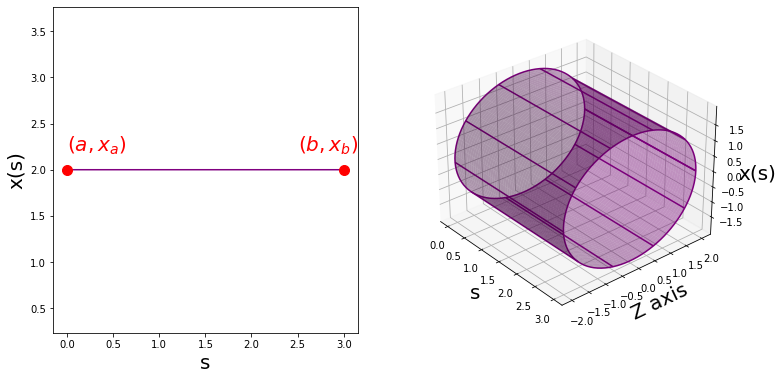

In [15]:
n = 100

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122,projection='3d')

#initial conditions
xa, xb= alpha, alpha

#dominio de la funcion
t=np.arange(a,b, step=0.001)

#funcion solucion evaluada en cada t
y_t=sol[1]

#parametro 2 de la parametrizacion
theta = np.linspace(0, 2*np.pi, n)
#creamos una malla para t,theta
T, THETA = np.meshgrid(t, theta)
#REFERENCIA PARA MESHGRID: https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html

#coordenadas del solido de revolucion
Y_T = np.ones((n, 1))*y_t #matrix whose rows are reapeted and equal to the solution vector
Y = Y_T*np.cos(THETA)
Z = Y_T*np.sin(THETA)

###GRAFICAS

####Grafica de funcion a rotar
ax1.plot(t,y_t,'purple')
ax1.plot(a, xa,b,xb, marker="o", markersize=10, markeredgecolor="red", 
         markerfacecolor="red", label='condicion final e inicial') #graficando condicion inicial y final

ax1.text(a,xa+0.2, '$(a,x_a)$', color='red', fontsize=20)
ax1.text(b-0.5, xb+0.2, '$(b,x_b)$', color='red', fontsize=20)
#### Grafica solido revolucion
ax2.plot_wireframe(T, Y, Z,rcount=10,ccount=1, color='purple') #mostrar las secciones del solido
ax2.plot_surface(T, Y, Z, color='purple', alpha=0.4)
ax2.view_init(elev=30, azim=-40) #para rotar la grafica

#etiquetar ejes:
ax1.set_xlabel('s', fontsize=20)
ax1.set_ylabel('x(s)', fontsize=20)
ax2.set_xlabel('s', fontsize=20)
ax2.set_ylabel('Z axis', fontsize=20)
ax2.set_zlabel('x(s)', fontsize=20)
ax1.axis('equal')
plt.show()

# Superficies de Delaunay

Probaremos diferentes configurtaciones de los hiperparametros para obtener las superficies de Delaunay. Recordemos que la ecuación a resolver es:
$$
    \dot{x}=\pm\frac{\sqrt{4x^2-(\lambda x^2-k_1)^2}}{\lambda x^2-k_1}
$$

# Primer superficie

Probaremos un grid search sobre $[-10,10]\times[-2,2]$ y condiciones de contorno
$$
a=-2\\
b=10\\
x_a=10\\
x_b=1196\\
vol=5615200
$$

In [5]:
k1= np.arange(start=-10, stop=10, step=1, dtype=float) #hiperparametro de la ecuacion diferencial np.arange(start=-5, stop=5, num=50)
Lambda= np.arange(start=-2,stop=2, step=0.1, dtype=float) #hiperparametro de la EDO

#condiciones de controno
a= -2
b= 10
xa= 10
xb= 1196
vol= 5615200

# Primer sup de Delaunay: Catenoide

In [6]:
superficie1=delaunay(k1=k1,Lambda=Lambda,a=a,b=b,xa=xa,xb=xb,vol=vol)

La condicion final se satisface salvo un error de 0.0005560663357114725
Volumen aproximado 5610712.72726831
error relativo entre volumen y volumen aprox 0.0007991296359327782
Se encontró una solución tal que
Los parametros que mejor se ajustan son k, lambda= 1.7763568394002505e-15 -5.0
El volumen de la mejor superficie es 5610712.72726831
El error relativo entre el volumen objetivo y volumen aproximado es 4487.272731689736
El error relativo entre condicion final objetivo y fin de la solucion aproximada es 4487.272731689736


In [7]:
print(superficie1)

(array([-2.   , -1.999, -1.998, ...,  9.997,  9.998,  9.999]), array([  10.        ,   10.00387378,   10.00774917, ..., 1194.3790612 ,
       1194.85690734, 1195.33494466]), 5610712.72726831, 4487.272731689736, (1.7763568394002505e-15, -5.0))


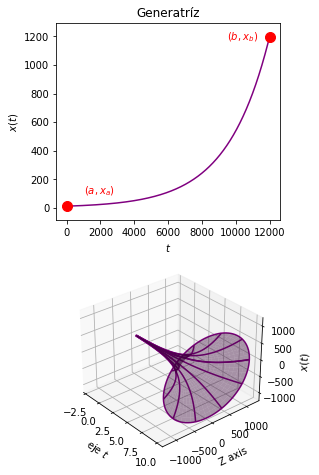

In [8]:
n = 100

#funcion solucion evaluada en cada t
y_t=superficie1[1]

#dominio de la parametrizacion
t=superficie1[0]
theta = np.linspace(0, 2*np.pi, n)

#creamos una malla para t,theta
T, THETA = np.meshgrid(t, theta)

#REFERENCIA PARA MESHGRID: https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html

#coordenadas del solido de revolucion
Y_T = np.ones((n, 1))*y_t #matrix whose rows are reapeted and equal to the solution vector
Y = Y_T*np.cos(THETA)
Z = Y_T*np.sin(THETA)

###GRAFICAS

fig = plt.figure(figsize=plt.figaspect(2.))
#fig.suptitle('Generatriz y catenoide')

####Grafica de funcion a rotar
ax = fig.add_subplot(2, 1, 1)
ax.plot(np.arange(0,12000,step=1),y_t,'purple')
ax.plot(a, xa,12000,xb, marker="o", markersize=10, markeredgecolor="red", 
         markerfacecolor="red", label='condicion final e inicial') #graficando condicion inicial y final
ax.text(1000, 100, '$(a,x_a)$', color='red')
ax.text(9500, xb-20, '$(b,x_b)$', color='red')
ax.axis(ymin=xa-100,ymax=xb+100)
ax.set_xlabel('$t$')
ax.set_ylabel('$x(t)$')
ax.title.set_text('Generatríz')

#### Grafica solido revolucion
ax = fig.add_subplot(2, 1, 2, projection='3d')
surf= ax.plot_wireframe(T, Y, Z,rcount=10,ccount=1, color='purple') #mostrar las secciones del solido
ax.title.set_text('')
ax.plot_surface(T, Y, Z, color='purple', alpha=0.4)
ax.view_init(elev=30, azim=-40) #para rotar la grafica


#etiquetar ejes:
ax.set_xlabel('eje $t$')
ax.set_ylabel('Z axis')
ax.set_zlabel('$x(t)$')
plt.show()

A partir de ésta podemos generar una catenoide, reflejando la curva solución respecto al eje $y$ y *soldandola*

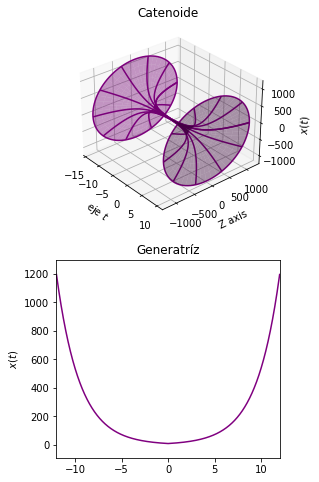

In [32]:
n = 100

#dominio de la parametrizacion
t1=np.arange(-14,10,0.001)
y_t1=np.concatenate([np.flip(superficie1[1]),superficie1[1]])
theta = np.linspace(0, 2*np.pi, n)

#creamos una malla para t,theta
T, THETA = np.meshgrid(t1, theta)

#REFERENCIA PARA MESHGRID: https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html

#coordenadas del solido de revolucion
Y_T = np.ones((n, 1))*y_t1 #matrix whose rows are reapeted and equal to the solution vector
Y = Y_T*np.cos(THETA)
Z = Y_T*np.sin(THETA)

###GRAFICAS

fig = plt.figure(figsize=plt.figaspect(2.))
#### Grafica solido revolucion
ax = fig.add_subplot(2, 1, 1, projection='3d')
surf= ax.plot_wireframe(T, Y, Z,rcount=10,ccount=1, color='purple') #mostrar las secciones del solido
ax.title.set_text('')
ax.plot_surface(T, Y, Z, color='purple', alpha=0.4)
ax.view_init(elev=30, azim=-40) #para rotar la grafica
ax.title.set_text('Catenoide')
#etiquetar ejes:
ax.set_xlabel('eje $t$')
ax.set_ylabel('Z axis')
ax.set_zlabel('$x(t)$')

####Grafica de funcion a rotar
ax = fig.add_subplot(2, 1, 2)
ax.plot(np.arange(-12,12,step=0.001),y_t1,'purple')
#ax.plot(-a, xa,12000,xb, marker="o", markersize=10, markeredgecolor="red", 
       #  markerfacecolor="red", label='condicion final e inicial') #graficando condicion inicial y final
#ax.text(1, 100, '$(a,x_a)$', color='red')
#ax.text(9500, xb-20, '$(b,x_b)$', color='red')
ax.axis(xmin=-12,xmax=12)
ax.axis(ymin=xa-100,ymax=xb+100)
ax.set_ylabel('$x(t)$')
ax.title.set_text('Generatríz')
plt.show()

# Superficie 2

## Funcion Delaunay 1

In [1]:
from utils1 import *
k1= np.arange(-2, 4, step=1, dtype=int) #hiperparametro de la ecuacion diferencial np.arange(start=-5, stop=5, num=50)
Lambda= np.array([-0.2,-0.1,0,0.1,0.2]) #hiperparametro de la EDO
#condiciones de controno
a,b= 0,0.36
xa, xb=1.5,0.101101
vol= 1.2625

In [2]:
superficie2=delaunay(k1=k1,Lambda=Lambda,a=a,b=b,xa=xa,xb=xb,vol=vol)

0 voy en k,lambda= -0.2 -2
1 potencial solucion
2 test exitoso
1.711820720207518
0 voy en k,lambda= -0.1 -2
1 potencial solucion
2 test exitoso
1.764313936230136
0 voy en k,lambda= 0.0 -2
1 potencial solucion
2 test exitoso
1.818794830507478
0 voy en k,lambda= 0.1 -2
1 potencial solucion
2 test exitoso
1.8753351025159724
0 voy en k,lambda= 0.2 -2
1 potencial solucion
2 test exitoso
1.9340089549984922
0 voy en k,lambda= -0.2 -1
1 potencial solucion
2 test exitoso
1.5168779942374453
0 voy en k,lambda= -0.1 -1
1 potencial solucion
2 test exitoso
1.5683129960874713
0 voy en k,lambda= 0.0 -1
1 potencial solucion
2 test exitoso
1.621687437388641
0 voy en k,lambda= 0.1 -1
1 potencial solucion
2 test exitoso
1.677070904643017
0 voy en k,lambda= 0.2 -1
1 potencial solucion
2 test exitoso
1.734535481614587
0 voy en k,lambda= -0.2 0
1 potencial solucion
2 test exitoso
1.2949745309033402
0 voy en k,lambda= -0.1 0
1 potencial solucion
2 test exitoso
1.3460041435037495
0 voy en k,lambda= 0.0 0
1 pot

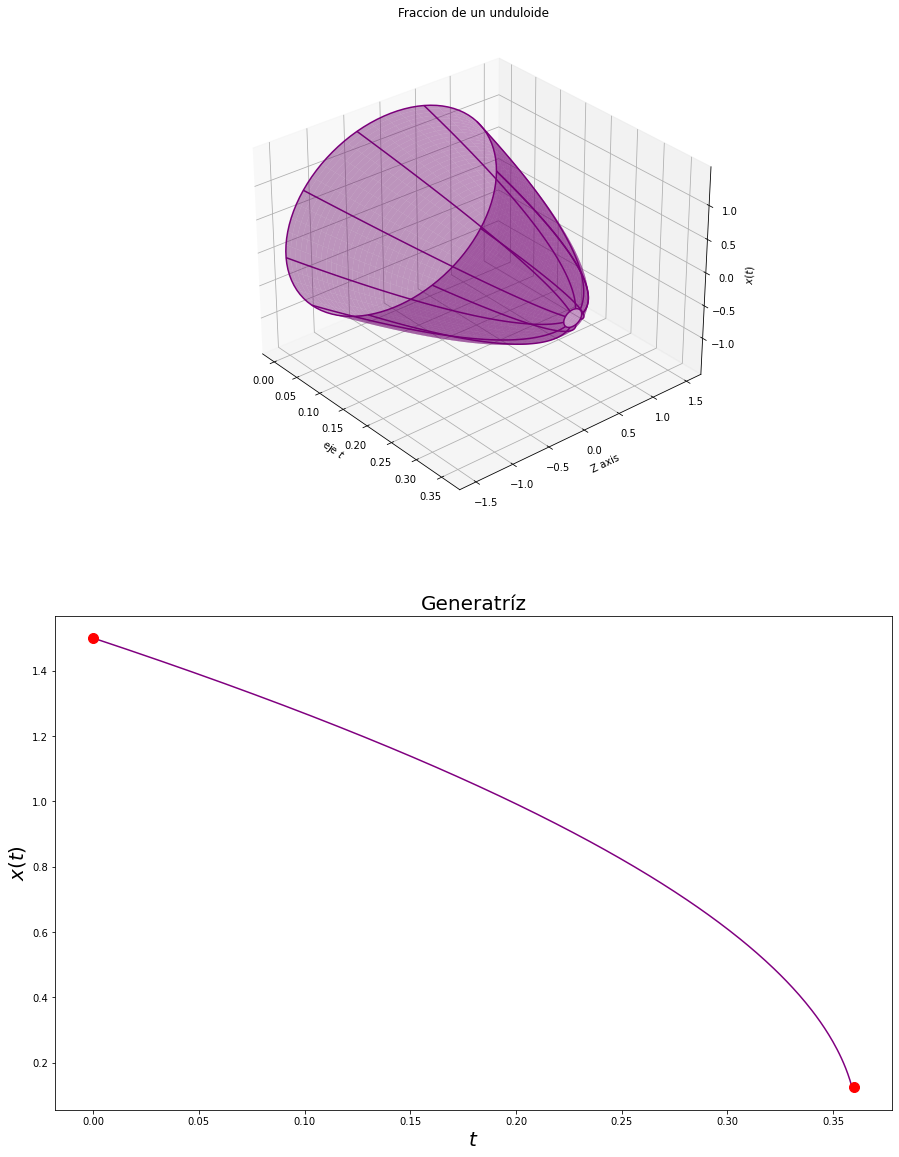

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
n = 100
#dominio de la parametrizacion
t=superficie2[0]
#funcion solucion evaluada en cada t
y_t=superficie2[1]


theta = np.linspace(0, 2*np.pi, n)

#creamos una malla para t,theta
T, THETA = np.meshgrid(t, theta)

#REFERENCIA PARA MESHGRID: https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html

#coordenadas del solido de revolucion
Y_T = np.ones((n, 1))*y_t #matrix whose rows are reapeted and equal to the solution vector
Y = Y_T*np.cos(THETA)
Z = Y_T*np.sin(THETA)

###GRAFICAS

fig = plt.figure(figsize=(15,20))
#### Grafica solido revolucion
ax = fig.add_subplot(2, 1, 1, projection='3d')
ax.plot_wireframe(T, Y, Z,rcount=10,ccount=1, color='purple') #mostrar las secciones del solido
ax.title.set_text('Fraccion de un unduloide')
ax.plot_surface(T, Y, Z, color='purple', alpha=0.4)
ax.view_init(elev=30, azim=-40) #para rotar la grafica

#etiquetar ejes:
ax.set_xlabel('eje $t$')
ax.set_ylabel('Z axis')
ax.set_zlabel('$x(t)$')

####Grafica de funcion a rotar
ax=fig.add_subplot(2, 1, 2)
ax.plot(t, y_t, 'purple')
ax.plot(a, xa,b,y_t[-1], marker="o", markersize=10, markeredgecolor="red", 
         markerfacecolor="red", label='condicion final e inicial') #graficando condicion inicial y final
ax.set_xlabel('$t$', fontsize=20)
ax.set_ylabel('$x(t)$',fontsize=20)
ax.set_title('Generatríz', fontsize=20)
plt.show()

plt.show()

## Funcion Delaunay 2

In [3]:
from utils1 import *
from utils3 import *
k1= np.arange(-2, 4, step=1, dtype=int) #hiperparametro de la ecuacion diferencial np.arange(start=-5, stop=5, num=50)
Lambda= np.array([-0.2,-0.1,0,0.1,0.2]) #hiperparametro de la EDO
print(Lambda[2])
print(k1[-1])
#condiciones de controno
a,b= 0,0.36
xa, xb=1.5,0.101101

0.0
3


In [4]:
superficie2=delaunay2(k1=k1,Lambda=Lambda,a=a,b=b,xa=xa,xb=xb)

voy en k,lambda= -0.2 -2
potencial solucion sin nans
potencial solucion xa neq xb
voy en k,lambda= -0.1 -2
potencial solucion sin nans
potencial solucion xa neq xb
voy en k,lambda= 0.0 -2
potencial solucion sin nans
potencial solucion xa neq xb
voy en k,lambda= 0.1 -2
potencial solucion sin nans
potencial solucion xa neq xb
voy en k,lambda= 0.2 -2
potencial solucion sin nans
potencial solucion xa neq xb
voy en k,lambda= -0.2 -1
potencial solucion sin nans
potencial solucion xa neq xb
voy en k,lambda= -0.1 -1
potencial solucion sin nans
potencial solucion xa neq xb
voy en k,lambda= 0.0 -1
potencial solucion sin nans
potencial solucion xa neq xb
voy en k,lambda= 0.1 -1
potencial solucion sin nans
potencial solucion xa neq xb
voy en k,lambda= 0.2 -1
potencial solucion sin nans
potencial solucion xa neq xb
voy en k,lambda= -0.2 0
potencial solucion sin nans
potencial solucion xa neq xb
voy en k,lambda= -0.1 0
potencial solucion sin nans
potencial solucion xa neq xb
voy en k,lambda= 0.0 0
p

In [6]:
print(superficie2)
print(superficie2[1][-1])

(array([0.000e+00, 1.000e-04, 2.000e-04, ..., 3.597e-01, 3.598e-01,
       3.599e-01]), array([1.5       , 1.49978499, 1.49956995, ..., 0.10687386, 0.10402787,
       0.10110187]), 1.2625811390459516, (-0.1, 3))
0.10110187085429476


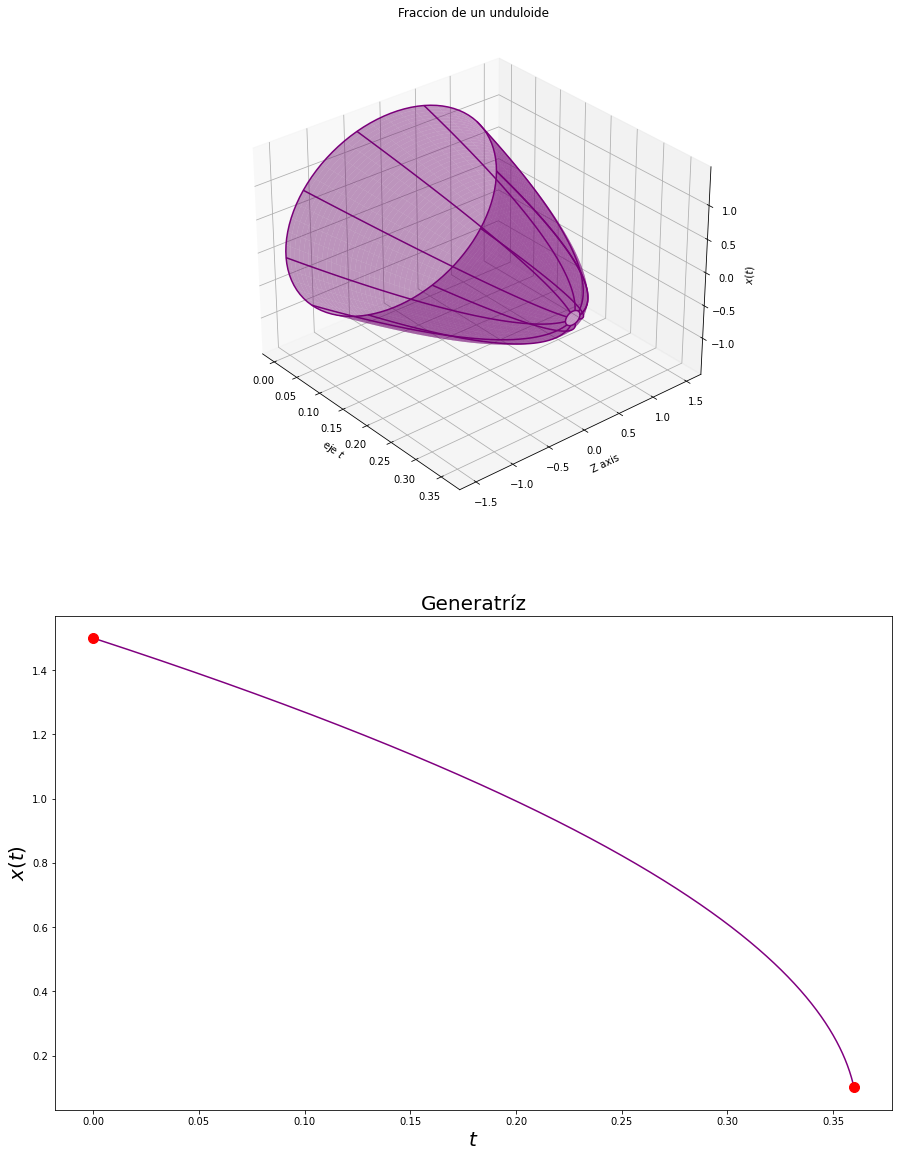

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
n = 100
#dominio de la parametrizacion
t=superficie2[0]
#funcion solucion evaluada en cada t
y_t=superficie2[1]


theta = np.linspace(0, 2*np.pi, n)

#creamos una malla para t,theta
T, THETA = np.meshgrid(t, theta)

#REFERENCIA PARA MESHGRID: https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html

#coordenadas del solido de revolucion
Y_T = np.ones((n, 1))*y_t #matrix whose rows are reapeted and equal to the solution vector
Y = Y_T*np.cos(THETA)
Z = Y_T*np.sin(THETA)

###GRAFICAS

fig = plt.figure(figsize=(15,20))
#### Grafica solido revolucion
ax = fig.add_subplot(2, 1, 1, projection='3d')
ax.plot_wireframe(T, Y, Z,rcount=10,ccount=1, color='purple') #mostrar las secciones del solido
ax.title.set_text('Fraccion de un unduloide')
ax.plot_surface(T, Y, Z, color='purple', alpha=0.4)
ax.view_init(elev=30, azim=-40) #para rotar la grafica

#etiquetar ejes:
ax.set_xlabel('eje $t$')
ax.set_ylabel('Z axis')
ax.set_zlabel('$x(t)$')

####Grafica de funcion a rotar
ax=fig.add_subplot(2, 1, 2)
ax.plot(t, y_t, 'purple')
ax.plot(a, xa,b,y_t[-1], marker="o", markersize=10, markeredgecolor="red", 
         markerfacecolor="red", label='condicion final e inicial') #graficando condicion inicial y final
ax.set_xlabel('$t$', fontsize=20)
ax.set_ylabel('$x(t)$',fontsize=20)
ax.set_title('Generatríz', fontsize=20)
plt.show()

plt.show()

Soldando para generar unduloide

In [7]:
#funcion solucion evaluada en cada t
y_t=superficie2[1]

#dominio de la parametrizacion
t=superficie2[0]

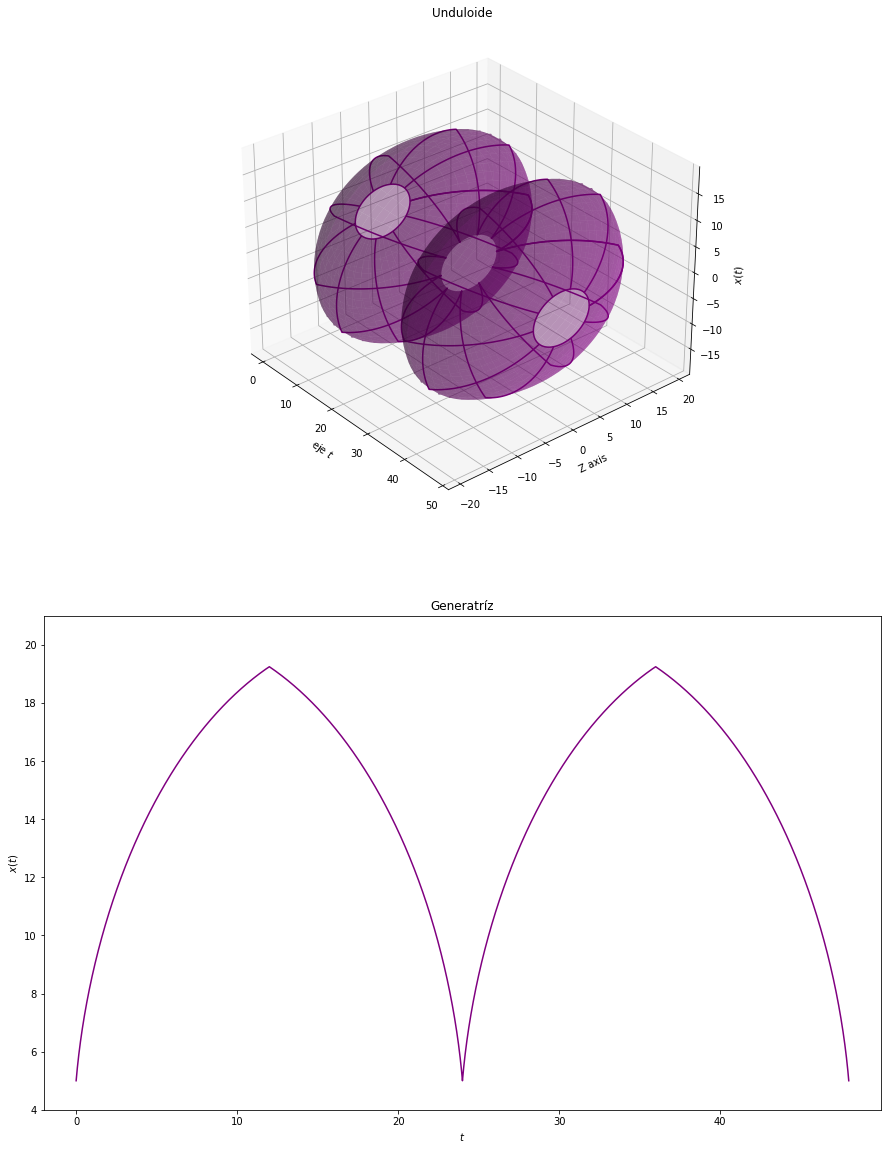

In [9]:
n = 100
t1=t[-1]+np.abs(t[-1]-np.flip(t))
yt1=np.flip(y_t)
t=np.concatenate([t,t1])
y_t=np.concatenate([y_t,yt1])

theta = np.linspace(0, 2*np.pi, n)

#creamos una malla para t,theta
T, THETA = np.meshgrid(t, theta)

#REFERENCIA PARA MESHGRID: https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html

#coordenadas del solido de revolucion
Y_T = np.ones((n, 1))*y_t #matrix whose rows are reapeted and equal to the solution vector
Y = Y_T*np.cos(THETA)
Z = Y_T*np.sin(THETA)

###GRAFICAS

fig = plt.figure(figsize=(15,20))
#fig.suptitle('Generatriz y catenoide')
#### Grafica solido revolucion
ax = fig.add_subplot(2, 1, 1, projection='3d')
surf= ax.plot_wireframe(T, Y, Z,rcount=10,ccount=1, color='purple') #mostrar las secciones del solido
ax.title.set_text('Unduloide')
ax.plot_surface(T, Y, Z, color='purple', alpha=0.4)
ax.view_init(elev=30, azim=-40) #para rotar la grafica


#etiquetar ejes:
ax.set_xlabel('eje $t$')
ax.set_ylabel('Z axis')
ax.set_zlabel('$x(t)$')

####Grafica de funcion a rotar
ax = fig.add_subplot(2, 1, 2)
ax.plot(t,y_t,'purple')
#ax.plot(a, xa,b,y_t[-1], marker="o", markersize=10, markeredgecolor="red", 
 #        markerfacecolor="red", label='condicion final e inicial') #graficando condicion inicial y final
#ax.text(1000, 17, '$(a,x_a)$', color='red')
#ax.text(9500, xb-20, '$(b,x_b)$', color='red')
ax.axis(xmin=t[0]-2,xmax=t[-1]+2)
ax.axis(ymin=xa-1,ymax=xb+1)
ax.set_xlabel('$t$')
ax.set_ylabel('$x(t)$')
ax.title.set_text('Generatríz')

plt.show()

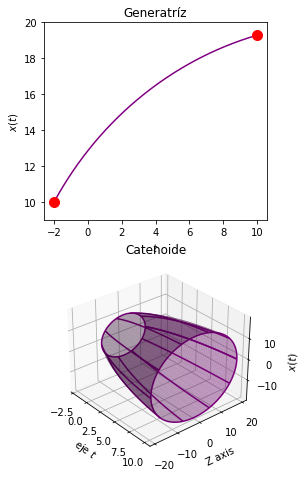

In [8]:
n = 100

#funcion solucion evaluada en cada t
y_t=superficie2[1]

#dominio de la parametrizacion
t=superficie2[0]
theta = np.linspace(0, 2*np.pi, n)

#creamos una malla para t,theta
T, THETA = np.meshgrid(t, theta)

#REFERENCIA PARA MESHGRID: https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html

#coordenadas del solido de revolucion
Y_T = np.ones((n, 1))*y_t #matrix whose rows are reapeted and equal to the solution vector
Y = Y_T*np.cos(THETA)
Z = Y_T*np.sin(THETA)

###GRAFICAS

fig = plt.figure(figsize=plt.figaspect(2.))
#fig.suptitle('Generatriz y catenoide')

####Grafica de funcion a rotar
ax = fig.add_subplot(2, 1, 1)
ax.plot(t,y_t,'purple')
ax.plot(a, xa,b,y_t[-1], marker="o", markersize=10, markeredgecolor="red", 
         markerfacecolor="red", label='condicion final e inicial') #graficando condicion inicial y final
#ax.text(1000, 17, '$(a,x_a)$', color='red')
#ax.text(9500, xb-20, '$(b,x_b)$', color='red')
ax.axis(ymin=xa-1,ymax=xb+1)
ax.set_xlabel('$t$')
ax.set_ylabel('$x(t)$')
ax.title.set_text('Generatríz')

#### Grafica solido revolucion
ax = fig.add_subplot(2, 1, 2, projection='3d')
surf= ax.plot_wireframe(T, Y, Z,rcount=10,ccount=1, color='purple') #mostrar las secciones del solido
ax.title.set_text('Catenoide')
ax.plot_surface(T, Y, Z, color='purple', alpha=0.4)
ax.view_init(elev=30, azim=-40) #para rotar la grafica


#etiquetar ejes:
ax.set_xlabel('eje $t$')
ax.set_ylabel('Z axis')
ax.set_zlabel('$x(t)$')
plt.show()

## Superficie 3: Undulonoide

In [38]:
def r(t,x):
    lam= -0.1
    k=3
    valor= (lam*x**2-k)/(2*x)
    return valor

In [45]:
a,b= 0,0.4
xa=1.5
xb=0.05
k1= np.arange(start=-4, stop=4, step=1, dtype=float) #hiperparametro de la ecuacion diferencial np.arange(start=-5, stop=5, num=50)
Lambda= np.arange(start=-1,stop=1, step=0.1, dtype=float) #hiperparametro de la EDO

In [46]:
def delaunay3(k1,Lambda,a,b,xa,xb):

    #extras
    n=len(k1)
    m=len(Lambda)
    global solfinal
    global integral_fin
    err_integral=1
    best_hyperparams=np.zeros(2)

    for i in k1:
        for j in Lambda:
            lam =j
            k=i
            def r(t,x):
                valor= (lam*x**2-k)/(2*x)
                return valor
            fun = r #funcion de la ecuacion diferencial que resolveremos
            solu=RK4(f=fun,a=a, b=b, alpha=xa, N=1000)
            t=solu[0]
            solu=solu[1]
            nans= np.isnan(solu)
            #verificar que el vector de soluciones no tenga nan's
            if(solu[-1]!='nan'):
                #verificar que la condicion final e inicial no sean iguales(pues ello implica que en algun momento)
                if(xb!=xa):
                    error=abs(xb-solu[-1]) #verificamos que el ultimo punto de la solucion este cerca de la condicion final
                    #print(f"La condicion final se satisface salvo un error de", error/xb)
                    #consideramos como factible soluciones con condicion final cerca y verificamos que cumple la condicion de volumen
                    if(error<0.1):
                        #Verificar que la solucion satisface la condición de volumen
                        print('1 Se encontró una solución tal que')
                        solfinal=solu
                        #integral_fin=integral
                        integrando=np.pi*solu**2
                        x = t
                        y = integrando
                        integral = integrate.cumtrapz(y, x, initial = a)
                        integral=integral[-1]-integral[0] #por el teorema fundamental del calculo
                        #err_int=err_integral
                        best_hyperparams= lam,k
                        print(f"Los parametros que mejor se ajustan son lambda, k=", lam, k)
                        print(f"El volumen de la mejor superficie es", integral)
                        #print(f"El error relativo entre el volumen objetivo y volumen aproximado es", err_integral)
                        print(f"El error abs entre condicion final objetivo y fin de la solucion aproximada es", err_integral)
                        return t, solfinal, integral, best_hyperparams

In [5]:
a,b= 0,0.36
xa=1.5
xb=0.0980
def r(t,x):
    lam= -0.1
    k=3
    valor= (lam*x**2-k)/(x)
    return valor
superficie4=RK4(f=r,a=a, b=b, alpha=xa, N=10000)

In [12]:
print(superficie4[0][-1])

0.3599


In [5]:
print(superficie4[1])

[1.5        1.49978499 1.49956995 ... 0.10687386 0.10402787 0.10110187]


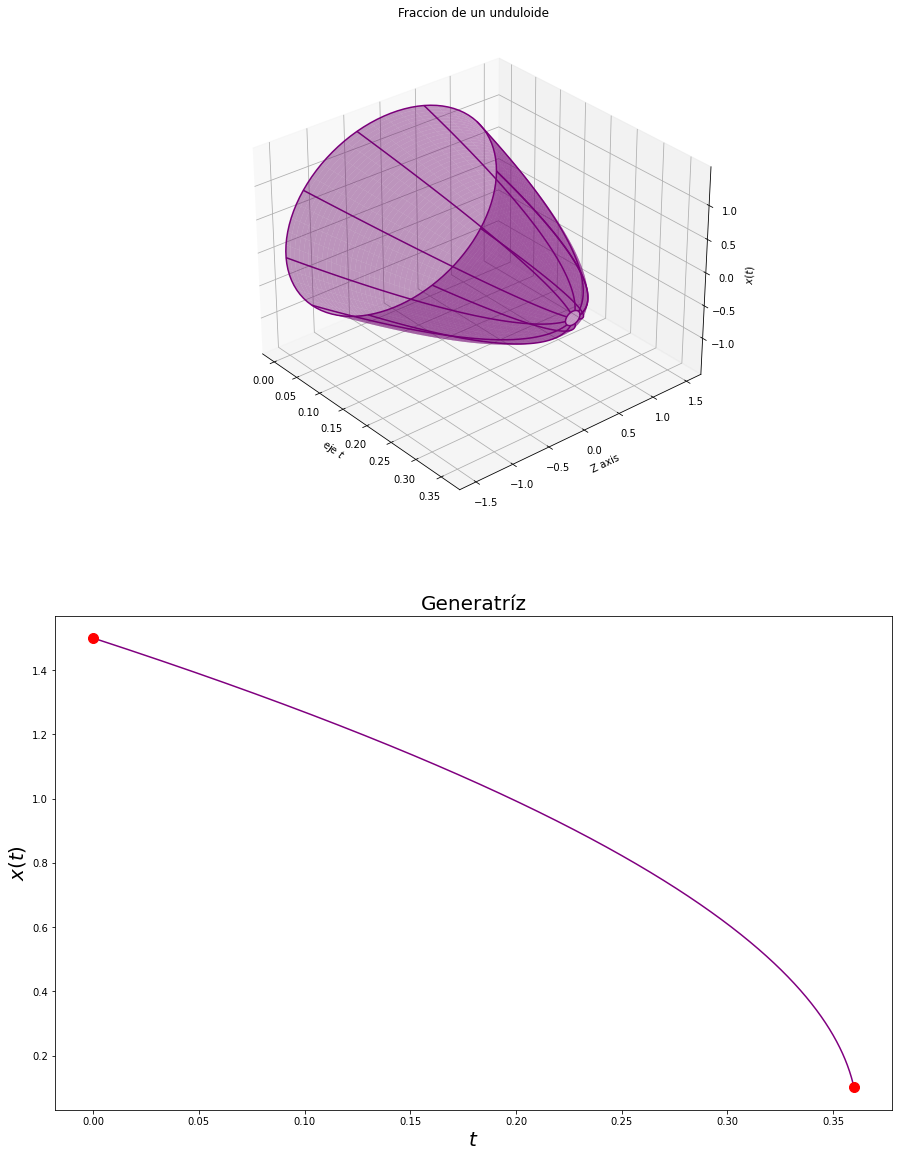

In [47]:
n = 100
#dominio de la parametrizacion
t=superficie4[0]
#funcion solucion evaluada en cada t
y_t=superficie4[1]


theta = np.linspace(0, 2*np.pi, n)

#creamos una malla para t,theta
T, THETA = np.meshgrid(t, theta)

#REFERENCIA PARA MESHGRID: https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html

#coordenadas del solido de revolucion
Y_T = np.ones((n, 1))*y_t #matrix whose rows are reapeted and equal to the solution vector
Y = Y_T*np.cos(THETA)
Z = Y_T*np.sin(THETA)

###GRAFICAS

fig = plt.figure(figsize=(15,20))
#### Grafica solido revolucion
ax = fig.add_subplot(2, 1, 1, projection='3d')
ax.plot_wireframe(T, Y, Z,rcount=10,ccount=1, color='purple') #mostrar las secciones del solido
ax.title.set_text('Fraccion de un unduloide')
ax.plot_surface(T, Y, Z, color='purple', alpha=0.4)
ax.view_init(elev=30, azim=-40) #para rotar la grafica

#etiquetar ejes:
ax.set_xlabel('eje $t$')
ax.set_ylabel('Z axis')
ax.set_zlabel('$x(t)$')

####Grafica de funcion a rotar
ax=fig.add_subplot(2, 1, 2)
ax.plot(superficie4[0], superficie4[1], 'purple')
ax.plot(a, xa,b,y_t[-1], marker="o", markersize=10, markeredgecolor="red", 
         markerfacecolor="red", label='condicion final e inicial') #graficando condicion inicial y final
ax.set_xlabel('$t$', fontsize=20)
ax.set_ylabel('$x(t)$',fontsize=20)
ax.set_title('Generatríz', fontsize=20)
plt.show()

plt.show()